# Import Dataset

In [1]:
import torch
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from torch import optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from torch import nn

In [2]:
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv"
df = pd.read_csv(url)
df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [3]:
df = df.drop(columns = ['unnamed:_0', 'customer', 'effective_to_date'])

In [4]:
df.dtypes

state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type                      object
month                              int64
dtype: object

In [5]:
from IPython.display import display
pd.set_option('display.max_columns', None)
display(df)

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.000000,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.000000,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.000000,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,97,10.000000,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,117,15.149071,31,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,253,15.149071,40,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,65,7.000000,68,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,201,11.000000,63,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,158,0.000000,27,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [6]:
df.nunique()

state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            37
months_since_policy_inception     100
number_of_open_complaints           7
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
vehicle_type                        1
month                               2
dtype: int64

In [7]:
unique_coverage = df['coverage'].unique()
print(unique_coverage)

['Basic' 'Extended' 'Premium']


In [8]:
unique_education = df['education'].unique()
print(unique_education)

['College' 'Bachelor' 'High School or Below' 'Doctor' 'Master']


In [9]:
unique_policy_type = df['policy_type'].unique()
print(unique_policy_type)

['Corporate Auto' 'Personal Auto' 'Special Auto']


In [10]:
unique_vehicle_size = df['vehicle_size'].unique()
print(unique_vehicle_size)

['Medsize' 'Small' 'Large']


In [11]:
coverage_dict = {"Basic":0, "Extended":1,"Premium":2}

In [12]:
education_dict = {"High School or Below":0, "College":1,"Bachelor":2, "Master": 3, "Doctor": 4}

In [13]:
policy_type_dict = {"Corporate Auto":0, "Personal Auto":1,"Special Auto":2}

In [14]:
vehicle_size_dict = {"Small":0, "Medsize":1,"Large":2}

In [15]:
df['coverage'] = df['coverage'].map(coverage_dict)

In [16]:
df['education'] = df['education'].map(education_dict)

In [17]:
df['policy_type'] = df['policy_type'].map(policy_type_dict)

In [18]:
df['vehicle_size'] = df['vehicle_size'].map(vehicle_size_dict)

In [19]:
df

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,Arizona,4809.216960,No,0,1,Employed,M,48029,Suburban,Married,61,7.000000,52,0.000000,9,0,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,1,A,2
1,California,2228.525238,No,0,1,Unemployed,F,0,Suburban,Single,64,3.000000,26,0.000000,1,1,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,1,A,1
2,Washington,14947.917300,No,0,2,Employed,M,22139,Suburban,Single,100,34.000000,31,0.000000,2,1,Personal L3,Offer3,Call Center,480.000000,SUV,1,A,2
3,Oregon,22332.439460,Yes,1,1,Employed,M,49078,Suburban,Single,97,10.000000,3,0.000000,2,0,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,1,A,1
4,Oregon,9025.067525,No,2,2,Medical Leave,F,23675,Suburban,Married,117,15.149071,31,0.384256,7,1,Personal L2,Offer1,Branch,707.925645,Four-Door Car,1,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,2,2,Unemployed,F,0,Suburban,Married,253,15.149071,40,0.384256,7,1,Personal L1,Offer3,Web,1214.400000,Luxury Car,1,A,1
10906,Oregon,5259.444853,No,0,1,Employed,F,61146,Urban,Married,65,7.000000,68,0.000000,6,1,Personal L3,Offer2,Branch,273.018929,Four-Door Car,1,A,1
10907,Arizona,23893.304100,No,1,2,Employed,F,39837,Rural,Married,201,11.000000,63,0.000000,2,0,Corporate L3,Offer1,Web,381.306996,Luxury SUV,1,A,2
10908,California,11971.977650,No,2,1,Employed,F,64195,Urban,Divorced,158,0.000000,27,4.000000,6,1,Personal L1,Offer1,Branch,618.288849,SUV,1,A,2


In [20]:
# For non-numerical columns, do dummies.

cat_f = df[["state","response","employmentstatus","gender","location_code","marital_status"
            ,"policy","renew_offer_type","sales_channel","vehicle_class","vehicle_type"]]
num_f = df.drop(columns=["state","response","employmentstatus","gender","location_code","marital_status"
            ,"policy","renew_offer_type","sales_channel","vehicle_class","vehicle_type"])

In [21]:
cat_f

,state,response,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_type
0,Arizona,No,Employed,M,Suburban,Married,Corporate L3,Offer3,Agent,Four-Door Car,A
1,California,No,Unemployed,F,Suburban,Single,Personal L3,Offer4,Call Center,Four-Door Car,A
2,Washington,No,Employed,M,Suburban,Single,Personal L3,Offer3,Call Center,SUV,A
3,Oregon,Yes,Employed,M,Suburban,Single,Corporate L3,Offer2,Branch,Four-Door Car,A
4,Oregon,No,Medical Leave,F,Suburban,Married,Personal L2,Offer1,Branch,Four-Door Car,A
...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Unemployed,F,Suburban,Married,Personal L1,Offer3,Web,Luxury Car,A
10906,Oregon,No,Employed,F,Urban,Married,Personal L3,Offer2,Branch,Four-Door Car,A
10907,Arizona,No,Employed,F,Rural,Married,Corporate L3,Offer1,Web,Luxury SUV,A
10908,California,No,Employed,F,Urban,Divorced,Personal L1,Offer1,Branch,SUV,A


In [22]:
num_f

,customer_lifetime_value,coverage,education,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,total_claim_amount,vehicle_size,month
0,4809.216960,0,1,48029,61,7.000000,52,0.000000,9,0,292.800000,1,2
1,2228.525238,0,1,0,64,3.000000,26,0.000000,1,1,744.924331,1,1
2,14947.917300,0,2,22139,100,34.000000,31,0.000000,2,1,480.000000,1,2
3,22332.439460,1,1,49078,97,10.000000,3,0.000000,2,0,484.013411,1,1
4,9025.067525,2,2,23675,117,15.149071,31,0.384256,7,1,707.925645,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,2,2,0,253,15.149071,40,0.384256,7,1,1214.400000,1,1
10906,5259.444853,0,1,61146,65,7.000000,68,0.000000,6,1,273.018929,1,1
10907,23893.304100,1,2,39837,201,11.000000,63,0.000000,2,0,381.306996,1,2
10908,11971.977650,2,1,64195,158,0.000000,27,4.000000,6,1,618.288849,1,2


In [23]:
cat_f_encoded = pd.get_dummies(cat_f, drop_first = True)
cat_f_encoded

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
10906,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
10907,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
10908,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [24]:
features = pd.concat([num_f, cat_f_encoded] ,axis = 1).drop(columns = ['total_claim_amount'])
target = df['total_claim_amount']

In [25]:
features

,customer_lifetime_value,coverage,education,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,vehicle_size,month,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,4809.216960,0,1,48029,61,7.000000,52,0.000000,9,0,1,2,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2228.525238,0,1,0,64,3.000000,26,0.000000,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,14947.917300,0,2,22139,100,34.000000,31,0.000000,2,1,1,2,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,22332.439460,1,1,49078,97,10.000000,3,0.000000,2,0,1,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,9025.067525,2,2,23675,117,15.149071,31,0.384256,7,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,2,2,0,253,15.149071,40,0.384256,7,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
10906,5259.444853,0,1,61146,65,7.000000,68,0.000000,6,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
10907,23893.304100,1,2,39837,201,11.000000,63,0.000000,2,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
10908,11971.977650,2,1,64195,158,0.000000,27,4.000000,6,1,1,2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [26]:
target

0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: total_claim_amount, Length: 10910, dtype: float64

In [27]:
# Perform Train Test Split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [28]:
x_train

,customer_lifetime_value,coverage,education,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,vehicle_size,month,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
1453,8256.297800,0,2,62902,69,14.000000,94,0.000000,2,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
6796,5229.986897,0,3,18129,69,21.000000,56,0.000000,5,1,1,2,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2767,2729.126448,0,0,66900,68,15.000000,20,0.000000,1,1,0,2,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
10267,16355.313860,2,1,29439,146,15.149071,10,0.384256,2,1,2,2,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4310,4165.252177,2,2,58299,105,24.000000,22,1.000000,1,1,1,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,10747.030940,1,1,66446,136,8.000000,77,0.000000,3,0,2,2,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
3264,3199.753160,1,2,0,87,3.000000,43,0.000000,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9845,17930.604510,0,1,21708,68,15.149071,77,0.384256,2,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10799,8543.247323,0,2,99180,106,15.000000,20,0.000000,3,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0


In [29]:
y_train

1453     159.383042
6796     364.695093
2767     326.400000
10267    700.800000
4310     504.000000
            ...    
4859     639.464548
3264     132.492438
9845     326.400000
10799     33.751887
2732     302.400000
Name: total_claim_amount, Length: 8728, dtype: float64

# Linear Regression

In [30]:
normalizer = MinMaxScaler()
normalizer.fit(x_train)
x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

In [31]:
x_train_norm = pd.DataFrame(x_train_norm, columns = x_train.columns)
x_train_norm

,customer_lifetime_value,coverage,education,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,vehicle_size,month,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.087906,0.0,0.50,0.629140,0.033755,0.400000,0.949495,0.000000,0.125,0.5,0.5,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.046066,0.0,0.75,0.181324,0.033755,0.600000,0.565657,0.000000,0.500,0.5,0.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.011491,0.0,0.00,0.669127,0.029536,0.428571,0.202020,0.000000,0.000,0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.199878,1.0,0.25,0.294446,0.358650,0.432831,0.101010,0.076851,0.125,0.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.031346,1.0,0.50,0.583101,0.185654,0.685714,0.222222,0.200000,0.000,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8723,0.122342,0.5,0.25,0.664586,0.316456,0.228571,0.777778,0.000000,0.250,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8724,0.017997,0.5,0.50,0.000000,0.109705,0.085714,0.434343,0.000000,0.000,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8725,0.221657,0.0,0.25,0.217121,0.029536,0.432831,0.777778,0.076851,0.125,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8726,0.091873,0.0,0.50,0.991988,0.189873,0.428571,0.202020,0.000000,0.250,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
x_test_norm = pd.DataFrame(x_test_norm, columns = x_test.columns)
x_test_norm

,customer_lifetime_value,coverage,education,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,vehicle_size,month,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.119905,0.5,0.50,0.920615,0.299578,0.200000,0.777778,0.000000,0.250,0.5,0.5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.054484,0.0,0.00,0.810974,0.050633,0.142857,0.858586,0.000000,0.375,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.027236,0.5,0.25,0.796431,0.156118,0.171429,0.040404,0.000000,0.000,0.5,0.5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.021097,0.5,0.25,0.299637,0.122363,0.228571,0.777778,0.000000,0.000,0.5,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.074412,0.0,0.50,0.326332,0.025316,0.400000,0.535354,0.800000,0.125,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.068491,0.0,0.25,0.000000,0.033755,0.200000,0.454545,0.200000,0.125,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.076163,0.0,0.50,0.381763,0.004219,0.514286,0.828283,0.000000,0.125,0.0,0.5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.080494,0.0,0.00,0.673448,0.552743,0.432831,0.101010,0.076851,0.000,0.5,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2180,0.014594,0.0,1.00,0.764885,0.054852,0.114286,0.797980,0.400000,0.000,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(x_train_norm, y_train)

LinearRegression()

In [36]:
lr.score(x_test_norm, y_test)

0.7586806121500722

In [37]:
lr.intercept_

-33.26106466963449

In [38]:
features.columns

Index(['customer_lifetime_value', 'coverage', 'education', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'vehicle_size', 'month',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_Yes', 'employmentstatus_Employed',
       'employmentstatus_Medical Leave', 'employmentstatus_Retired',
       'employmentstatus_Unemployed', 'gender_M', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Married',
       'marital_status_Single', 'policy_Corporate L2', 'policy_Corporate L3',
       'policy_Personal L1', 'policy_Personal L2', 'policy_Personal L3',
       'policy_Special L1', 'policy_Special L2', 'policy_Special L3',
       'renew_offer_type_Offer2', 'renew_offer_type_Offer3',
       'renew_offer_type_Offer4', 'sales_channel_Branch',
       'sales_channel_Call Center', 'sales_channel_Web',
      

In [39]:
lr.coef_

array([-7.56762894e+00, -2.19104641e+01, -2.53663628e+01, -2.27467150e+01,
        1.25148106e+03,  7.93736080e+00,  3.34759561e+00, -4.37668511e+00,
        4.63852423e+00,  2.02598448e+01, -4.40327204e+00, -9.37977801e-01,
        3.12086704e+00,  1.07008007e+00, -1.98706130e+00,  9.99916808e+00,
       -2.49734174e+01, -1.13927546e+01,  1.83426801e+01, -9.30196133e+00,
        6.80236785e+01,  1.31488851e+01,  3.80295651e+02,  2.22843386e+02,
       -8.20348232e+00,  6.21672794e+01, -1.75134565e+00,  6.73709587e+00,
        3.64551962e+00, -1.74546648e+00, -5.19138360e+00,  3.95304967e+01,
       -9.01156751e+00, -8.61341923e+00,  2.00865537e+01,  7.83208121e+00,
        5.05363565e+00,  2.00656738e+00,  1.91352543e+00,  8.42529729e-01,
        3.62728633e+01, -2.36034822e+01, -2.17317666e+01, -3.15341982e+01,
       -1.18364095e+00])

# NN

In [40]:
# Perform Train Test Split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [41]:
# Linear Regression

normalizer = MinMaxScaler()
normalizer.fit(x_train)
x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

In [42]:
y_train_nn = np.array(y_train)
y_test_nn = np.array(y_test)

In [43]:
X_train_tensor = torch.tensor(x_train_norm,  dtype=torch.float32)
X_test_tensor = torch.tensor(x_test_norm,  dtype=torch.float32)

y_train = torch.tensor(y_train_nn, dtype = torch.float32).view(-1,1) # (-1) as much as it takes rows, and (1) is one column
y_test = torch.tensor(y_test_nn, dtype = torch.float32).view(-1,1)

In [44]:
X_train_tensor

tensor([[0.0879, 0.0000, 0.5000,  ..., 0.0000, 0.0000, 1.0000],
        [0.0461, 0.0000, 0.7500,  ..., 0.0000, 0.0000, 0.0000],
        [0.0115, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.2217, 0.0000, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
        [0.0919, 0.0000, 0.5000,  ..., 1.0000, 0.0000, 0.0000],
        [0.0078, 0.0000, 0.2500,  ..., 0.0000, 0.0000, 0.0000]])

In [45]:
y_train

tensor([[159.3830],
        [364.6951],
        [326.4000],
        ...,
        [326.4000],
        [ 33.7519],
        [302.4000]])

#### Creating the NN

In [46]:
class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_layer_size1, hidden_layer_size2, hidden_layer_size3, output_size):
        super(SimpleNeuralNetwork, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size, hidden_layer_size1),
                                     nn.ReLU(),
                                     nn.Linear(hidden_layer_size1, hidden_layer_size2),
                                     nn.ReLU(),
                                     nn.Linear(hidden_layer_size2, hidden_layer_size3),
                                     nn.ReLU(),
                                     nn.Linear(hidden_layer_size3, output_size))
    def forward(self, x):
        return self.network(x)

In [47]:
my_nn = SimpleNeuralNetwork(45, 32, 16, 8, 1)

In [48]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(my_nn.parameters(), lr=0.001)

# Training the model
epochs = 5000
for epoch in range(epochs):
    my_nn.train()  # Set the model to training mode

    # Forward pass
    outputs = my_nn(X_train_tensor)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 25 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [25/5000], Loss: 274571.9062
Epoch [50/5000], Loss: 273772.3438
Epoch [75/5000], Loss: 270820.1875
Epoch [100/5000], Loss: 262475.4688
Epoch [125/5000], Loss: 243070.0938
Epoch [150/5000], Loss: 206389.4688
Epoch [175/5000], Loss: 153101.2969
Epoch [200/5000], Loss: 102068.6250
Epoch [225/5000], Loss: 79351.7266
Epoch [250/5000], Loss: 75001.9609
Epoch [275/5000], Loss: 71814.2188
Epoch [300/5000], Loss: 68712.6406
Epoch [325/5000], Loss: 65541.2422
Epoch [350/5000], Loss: 62359.5742
Epoch [375/5000], Loss: 59199.3516
Epoch [400/5000], Loss: 56092.1133
Epoch [425/5000], Loss: 53086.3945
Epoch [450/5000], Loss: 50228.6602
Epoch [475/5000], Loss: 47557.5938
Epoch [500/5000], Loss: 45106.1562
Epoch [525/5000], Loss: 42885.9414
Epoch [550/5000], Loss: 40879.4727
Epoch [575/5000], Loss: 39039.6172
Epoch [600/5000], Loss: 37353.6094
Epoch [625/5000], Loss: 35793.5547
Epoch [650/5000], Loss: 34331.0625
Epoch [675/5000], Loss: 32939.2734
Epoch [700/5000], Loss: 31591.1426
Epoch [725/5000

Test Loss: 14650.7285


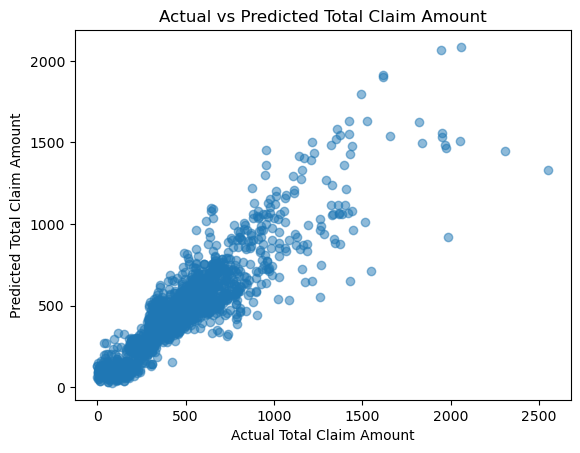

In [49]:
my_nn.eval()  # This sets the model to evaluation mode
with torch.no_grad():
    predictions = my_nn(X_test_tensor)
    test_loss = criterion(predictions, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plotting our results
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions.numpy(), alpha=0.5)
plt.xlabel('Actual Total Claim Amount')
plt.ylabel('Predicted Total Claim Amount')
plt.title('Actual vs Predicted Total Claim Amount')
plt.show()

In [50]:
from sklearn.metrics import r2_score

# Evaluate the model
#model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = my_nn(X_test_tensor).numpy()
    actuals = y_test.numpy()

r2 = r2_score(actuals, predictions)
print(f'R2 score: {r2:.4f}')

R2 score: 0.8273


In [ ]:
X,y = fetch_california_housing(return_X_y = True , as_frame = True)

In [ ]:
y

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
y_test

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train_scaled,  dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled,  dtype=torch.float32)

y_train = torch.tensor(y_train, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)

In [ ]:
from torch import nn

In [ ]:
class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(SimpleNeuralNetwork, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size, hidden_layer_size), 
                                     nn.Linear(hidden_layer_size, output_size))
    def forward(self, x):
        return self.network(x)

In [ ]:
my_nn = SimpleNeuralNetwork(8, 10, 1)

In [ ]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(my_nn.parameters(), lr=0.001)

# Training the model
epochs = 500
for epoch in range(epochs):
    my_nn.train()  # Set the model to training mode

    # Forward pass
    outputs = my_nn(X_train_tensor)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 25 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

In [ ]:
my_nn.eval()  # This sets the model to evaluation mode
with torch.no_grad():
    predictions = my_nn(X_test_tensor)
    test_loss = criterion(predictions, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

# Plotting our results
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions.numpy(), alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Evaluate the model
#model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = my_nn(X_test_tensor).numpy()
    actuals = y_test.numpy()

r2 = r2_score(actuals, predictions)
print(f'R2 score: {r2:.4f}')

# Lab

In [ ]:
# https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv

In [ ]:
# claim amount using linear regression and NN( neurons number is between average between input and output, and arounnd )

In [ ]:
# scaling num and encoding categorical